<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plotting-historical-data" data-toc-modified-id="Plotting-historical-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting historical data</a></span></li></ul></div>

# Plotting historical data 

In [62]:
# Import libraries
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import datetime

In [2]:
# Loading datasets
hist_cost_data = pd.read_csv('data/Historical_data_summary.csv', names = ['tech', 'year', 'c_inv','installed_cap'], header=0)
hist_cost_electrolysis = pd.read_csv('data/Historical_electrolysis.csv', names = ['tech', 'year', 'c_inv','installed_cap','annual_prod'], header=0)
hist_cost_carbon_capture = pd.read_csv('data/Historical_carbon_capture.csv', names = ['tech', 'year', 'c_inv','installed_cap'], header=0)
hist_cost_gshp = pd.read_csv('data/Historical_gshp.csv', names = ['tech', 'year', 'c_inv','installed_cap'], header=0)
ng_eu = pd.read_csv('data/ODA-PNGASEU_USD.csv', header=0)

## All technologies

In [3]:
hist_cost_data

,tech,year,c_inv,installed_cap
0,ONSHORE_WIND,2010,1914.0,178.0
1,ONSHORE_WIND,2011,1883.0,216.0
2,ONSHORE_WIND,2012,1937.0,261.0
3,ONSHORE_WIND,2013,1797.0,292.0
4,ONSHORE_WIND,2014,1745.0,340.0
...,...,...,...,...
122,HYDRO_TOTAL,2016,1753.0,1245.0
123,HYDRO_TOTAL,2017,1799.0,1269.0
124,HYDRO_TOTAL,2018,1410.0,1292.0
125,HYDRO_TOTAL,2019,1674.0,1305.0


In [9]:
ng_eu['Date'] = pd.to_datetime(ng_eu['Date'])

In [17]:
ng_eu = ng_eu[ng_eu.Date.dt.year >= 2010]

In [20]:
ng_eu.Value = (1/0.293071)*ng_eu.Value # from usd/mmbtu to usd/MWh

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
ng_eu.head()

,Date,Value
0,2022-10-31,70.995209
1,2022-09-30,188.279043
2,2022-08-31,238.772309
3,2022-07-31,174.517139
4,2022-06-30,112.302504


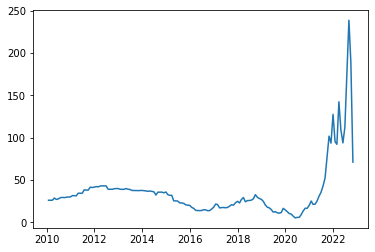

In [22]:
plt.plot(ng_eu.Date, ng_eu.Value)

In [24]:
techs = {"ONSHORE_WIND":{"name":"Onshore wind", "color":"tab:green"},
         "OFFSHORE_WIND":{"name":"Offshore wind", "color":"limegreen"},
        "UTILITY_PV":{"name":"Utility-scale PV", "color":"gold"},
        "COMMERCIAL_PV":{"name":"French commercial PV", "color":"goldenrod"},
        "DEC_SOLAR":{"name":"CSP", "color":"dodgerblue"}
         }

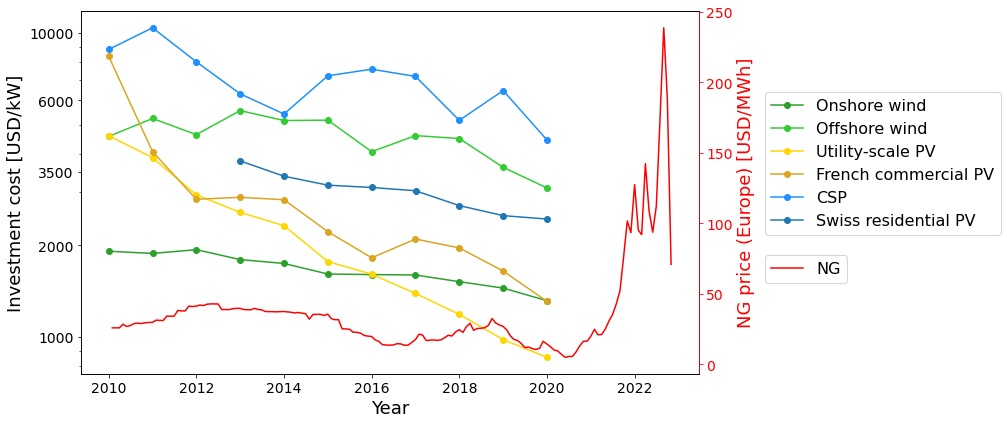

In [89]:
list_techs = ["ONSHORE_WIND", "OFFSHORE_WIND", "UTILITY_PV", "COMMERCIAL_PV", "DEC_SOLAR"]

fig, ax1 = plt.subplots(figsize=(16,6))

for tech in list_techs:
    # x = range(2010,2021)
    x = pd.date_range(start='2010-01-01', end='2020-01-01', periods=11)
    y = hist_cost_data[hist_cost_data.tech == tech].c_inv
    plt.plot(x, y, label=techs[tech]["name"], color=techs[tech]["color"], marker="o")
ax1.plot(pd.date_range(start='2013-01-01', end='2020-01-01', periods=8),
         hist_cost_data[hist_cost_data.tech == "RES_PV"].c_inv, marker="o", label="Swiss residential PV")
ax1.legend(bbox_to_anchor=(1.5,0.8), fontsize=16)
ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("Investment cost [USD/kW]", fontsize=18)
ax1.tick_params(labelsize=14)
# plt.yticks(fontsize=14)
ax1.set_yscale("log")
ax1.set_yticks(ticks=[1000, 2000, 3500, 6000, 10000])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.grid(visible=False)
ax2 = ax1.twinx()
ax2.plot(ng_eu.Date, ng_eu.Value, color='r', label='NG')
ax2.set_ylabel("NG price (Europe) [USD/MWh]", fontsize=18, color='r')
ax2.tick_params(labelsize=14, colors='r')
ax2.spines['right'].set_color('r')
ax2.legend(bbox_to_anchor=(1.252,0.35), fontsize=16)
plt.tight_layout()
# plt.savefig("pics/historical_inv_costs.pdf", format="pdf")
plt.show()

## Single technologies

In [159]:
# graph parameters
axis_title_size = 55
marker_size = 15
line_width = 1.5
years_font_size = 45

In [4]:
# colours 

colour_main_axis = "rgb(10,10,10)"
colour_second_axis = "rgb(10,10,10)"
colour_carbon_capture = "rgb(105,105,105)"

# Blue
colour_onshore_wind = 'rgb(0,0,205)'
colour_offshore_wind = 'rgb(30,144,255)'
colour_hydro = 'rgb(25,25,112)'

# Yellow/orange
colour_res_pv = 'rgb(255,220,0)'
colour_uti_pv = 'rgb(255,180,0)'
colour_com_pv = 'rgb(255,140,0)'
colour_csp_solar = 'rgb(218,165,32)'

# other
colour_gshp = 'rgb(50,205,50)'
colour_ashp = 'rgb(0,128,128)'
colour_geoth = 'rgb(0,100,0)'
colour_soec = 'rgb(139,0,139)'
colour_alk = 'rgb(210,105,30)'
colour_pem = 'rgb(178,34,34)'

In [171]:
def plot(tech, colour):  
    
    # Historical data
    hist_cost = hist_cost_gshp[hist_cost_gshp.tech == tech][['year','c_inv','installed_cap']]

    hist_installed_cap = hist_cost['installed_cap']
    hist_c_inv = hist_cost['c_inv']
    hist_year = hist_cost['year']
    
    cap_even = hist_installed_cap[::2]
    cap_odd = hist_installed_cap[1::2]
    c_inv_even = hist_c_inv[::2]
    c_inv_odd = hist_c_inv[1::2]
    year_even = hist_year[::2]
    year_odd = hist_year[1::2]

#     cap_top = list(hist_installed_cap[0:6]) + list(hist_installed_cap[7:])
#     cap_down = hist_installed_cap[6:7]
#     c_inv_top = list(hist_c_inv[0:6]) + list(hist_c_inv[7:])
#     c_inv_down = hist_c_inv[6:7]
#     year_top = list(hist_year[0:6]) + list(hist_year[7:])
#     year_down = hist_year[6:7]
    
    cap_min = hist_installed_cap.min()
    cap_max = hist_installed_cap.max()

    fig = go.Figure()

    fig.update_layout(
        title=dict(text="",y=1),
        xaxis1=dict(title="Cumulative Capacity [GW]"),
        yaxis1=dict(title="Investment Cost [USD<sub>2018</sub>/kW]"),
        xaxis_range=[np.log10(0.65*cap_min),np.log10(1.2*cap_max)],
        font=dict(
            family="Times New Roman",
            size=axis_title_size,
            color=colour_main_axis),
        legend=dict(x=1.20)
    )

    fig.update_xaxes(type="log",title_font_family="Times New Roman",showgrid=True)
    fig.update_yaxes(type="log",title_font_family="Times New Roman",showgrid=True)

    # Add traces

#     fig.add_trace(go.Scatter(x=hist_installed_cap, y=hist_c_inv,
#                              text = hist_year,
#                              textposition='top right',
#                              mode='markers+text',
#                              marker_symbol='circle',
#                              textfont_size=years_font_size,
#                              legendgroup="group",
#                              name=tech+' - Historical',
#                              marker = dict(color=colour, size=marker_size)))

    fig.add_trace(go.Scatter(x=cap_even, y=c_inv_even,
                             text = year_even,
                             textposition='top center',
                             mode='markers+text',
                             marker_symbol='circle',
                             textfont_size=years_font_size,
                             #legendgroup="group",
                             #name=tech+' - Historical',
                             showlegend = False,
                             marker = dict(color=colour, size=marker_size)))
    
    fig.add_trace(go.Scatter(x=cap_odd, y=c_inv_odd,
                             #text = year_odd,
                             #textposition='bottom center',
                             mode='markers',
                             marker_symbol='circle',
                             #textfont_size=years_font_size,
                             #legendgroup="group",
                             #name=tech+' - Historical',
                             showlegend = False,
                             marker = dict(color=colour, size=marker_size)))
    fig.show()
    
    # Download image
    fig.write_image("pics/"+tech+".pdf",width=1200, height=1200, scale=1)

The *tech* argument of the *plot* function is a string belonging to the folowing list:

In [6]:
hist_cost_data.tech.unique()

array(['ONSHORE_WIND', 'RES_PV', 'DEC_HP_ELEC', 'DEC_SOLAR',
       'DHN_HP_ELEC', 'OFFSHORE_WIND', 'UTILITY_PV', 'COMMERCIAL_PV',
       'GEOTHERMAL', 'HYDRO_TOTAL'], dtype=object)

As well as GSHP:

In [7]:
hist_cost_gshp.tech.unique()

array(['DHN_HP_ELEC'], dtype=object)

In [172]:
plot('DHN_HP_ELEC', colour_gshp)

Note: the downloaded image looks much better than the one showed in the notebook !

In [147]:
def plot_carbon_capture(tech, colour):
    
    # Historical data
    hist_cost = hist_cost_carbon_capture[hist_cost_carbon_capture.tech == tech][['year','c_inv','installed_cap']]

    hist_installed_cap = hist_cost['installed_cap']
    hist_c_inv = hist_cost['c_inv']
    hist_year = hist_cost['year']
    
    cap_min = hist_installed_cap.min()
    cap_max = hist_installed_cap.max()
    
    fig = go.Figure()

    fig.update_layout(
        title=dict(text="",y=1),
        xaxis1=dict(title="CO<sub>2</sub> capture capacity [Mtpa]"),
        yaxis1=dict(title="Investment Cost [USD<sub>2018</sub>/tCO<sub>2</sub>]"),
        xaxis_range=[np.log10(12),np.log10(37)],
        yaxis_range=[np.log10(60),np.log10(120)],
        font=dict(
            family="Times New Roman",
            size=axis_title_size,
            color=colour_main_axis),
        legend=dict(x=1.20)
    )

    fig.update_xaxes(type="log",title_font_family="Times New Roman",showgrid=True)
    fig.update_yaxes(type="log",title_font_family="Times New Roman",showgrid=True)

    # Add traces

    fig.add_trace(go.Scatter(x=hist_installed_cap, y=hist_c_inv,
                             text = hist_year,
                             textposition='top right',
                             mode='markers+text',
                             marker_symbol='circle',
                             textfont_size=years_font_size,
                             marker = dict(color=colour, size=marker_size)))
    
    fig.show()
    
    # Download image
    fig.write_image("pics/carbon_capture.pdf",width=1200, height=1200, scale=1)

This function is only for carbon capture.

In [148]:
plot_carbon_capture('CARBON_CAPTURE', colour_carbon_capture)

In [134]:
def plot_electrolysis(tech, colour):
    # Historical data
    hist_cost = hist_cost_electrolysis[hist_cost_electrolysis.tech == tech][['year','c_inv','installed_cap']]
    hist_cost = hist_cost[hist_cost.year <= 2020]
    
    hist_installed_cap = hist_cost['installed_cap']
    hist_c_inv = hist_cost['c_inv']
    hist_year = hist_cost['year']

    cap_min = hist_installed_cap.min()
    cap_max = hist_installed_cap.max()
    
    fig = go.Figure()

    fig.update_layout(
        title=dict(text="",y=1),
        xaxis1=dict(title="Cumulative Capacity [GW]"),
        yaxis1=dict(title="Investment Cost [USD<sub>2018</sub>/kW]"),
        xaxis_range=[np.log10(0.92*cap_min),np.log10(2.0*cap_max)],
        font=dict(
            family="Times New Roman",
            size=axis_title_size,
            color=colour_main_axis),
        legend=dict(x=1.20)
    )

    fig.update_xaxes(type="log",title_font_family="Times New Roman",showgrid=True)
    fig.update_yaxes(type="log",title_font_family="Times New Roman",showgrid=True)

    # Add traces

    fig.add_trace(go.Scatter(x=hist_installed_cap, y=hist_c_inv,
                             #text=hist_year,
                             mode='markers',
                             #textposition='top right',
                             marker_symbol='circle',
                             #textfont_size=years_font_size,
                             marker = dict(color=colour, size=marker_size)))
    
    years = hist_cost.year.unique()
    for i in range(len(years)):
        x = float(hist_cost[(hist_cost.c_inv >= 0) & (hist_cost.year == years[i])].installed_cap.sample(1))
        y = float(hist_cost[(hist_cost.c_inv >= 0) & (hist_cost.year == years[i])].c_inv.sample(1))
        year = years[i]
        fig.add_annotation(x=np.log10(x), y=np.log10(y),
                text=str(year),
                showarrow=True,
                font=dict(
                    family="Times New Roman",
                    size=years_font_size,
                    color=colour_main_axis))
    
    fig.show()
    
    # Download image
    fig.write_image("pics/soec.pdf",width=1200, height=1200, scale=1)

This function is for the three electrolysis technologies:

In [55]:
hist_cost_electrolysis.tech.unique()

array(['SOEC_ELECTROLYSIS', 'PEM_ELECTROLYSIS', 'ALKALINE_ELECTROLYSIS'],
      dtype=object)

For example with ALK:

In [132]:
plot_electrolysis('SOEC_ELECTROLYSIS', colour_soec)